## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pywedge as pw
import bqplot

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
# Change the data type of column 'A' from float64 to float32
df['amount'] = df['amount'].astype('float32')
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype('float32')
df['oldbalanceDest'] = df['oldbalanceDest'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')

In [4]:
df['step'] = df['step'].astype('int32')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int32') 
df['isFraud'] = df['isFraud'].astype('int32') 

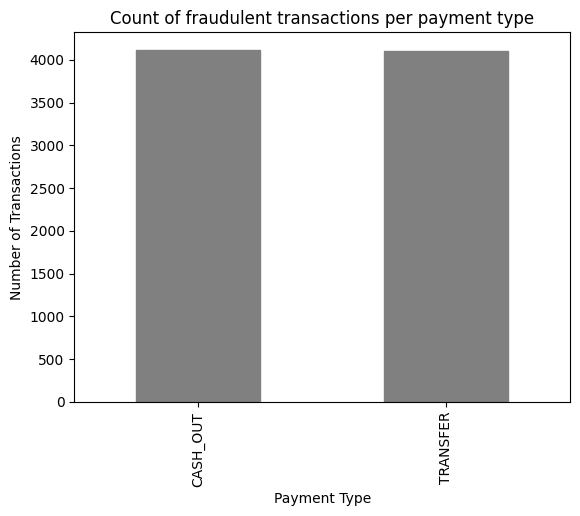

In [12]:
import matplotlib.pyplot as plt

# filter the data to only include fraud transactions
fraud_df = df[df['isFraud'] == 1]

# group the fraud data by payment type and count the number of transactions in each group
fraud_counts = fraud_df.groupby('type').size()

# plot a bar chart to visualize the fraud counts by payment type
fraud_counts.plot(kind='bar',color='gray',edgecolor ="gray")

# set the chart title and axes labels
plt.title('Count of fraudulent transactions per payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')

# display the chart
plt.show()

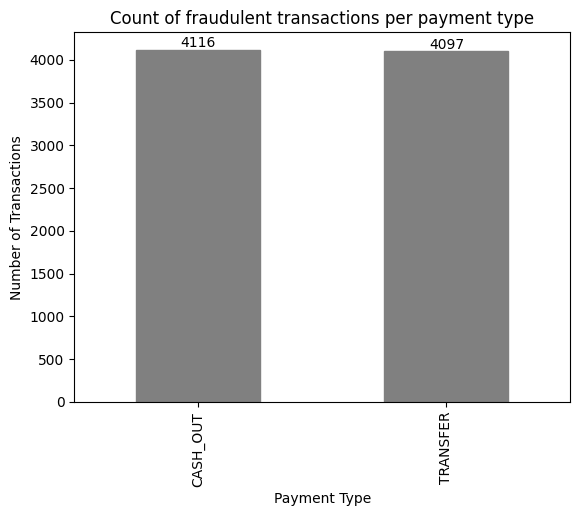

In [13]:
import matplotlib.pyplot as plt

# filter the data to only include fraud transactions
fraud_df = df[df['isFraud'] == 1]

# group the fraud data by payment type and count the number of transactions in each group
fraud_counts = fraud_df.groupby('type').size()

# plot a bar chart to visualize the fraud counts by payment type
ax = fraud_counts.plot(kind='bar', color='gray', edgecolor='gray')

# set the chart title and axes labels
plt.title('Count of fraudulent transactions per payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')

# display the count values over the top of each bar
for i, v in enumerate(fraud_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# display the chart
plt.show()

<AxesSubplot:xlabel='amount', ylabel='newbalanceOrig'>

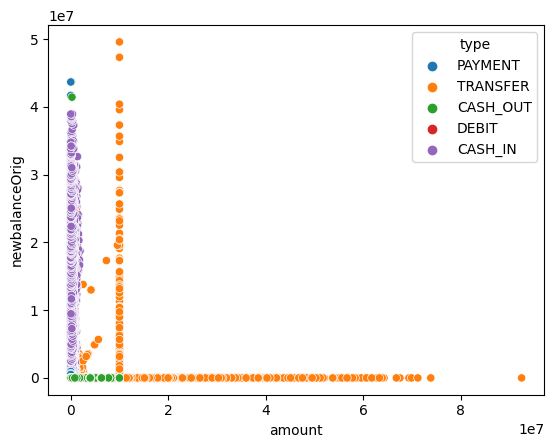

In [15]:
sns.scatterplot(data=df, x="amount", y="newbalanceOrig", hue="type")

<AxesSubplot:xlabel='amount', ylabel='oldbalanceDest'>

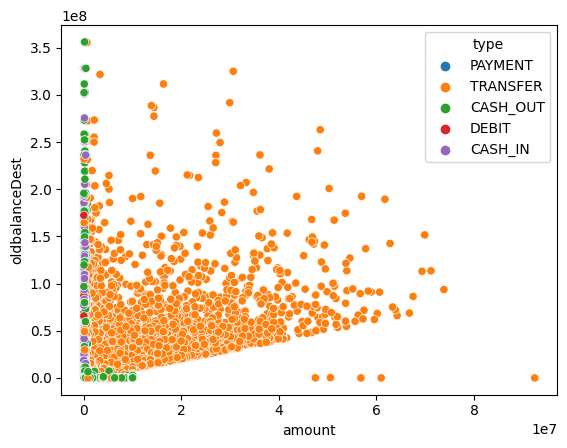

In [16]:
sns.scatterplot(data=df, x="amount", y="oldbalanceDest", hue="type")

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Missing values

In [4]:
 df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Check for any duplicated entries

In [5]:
# check for duplicate rows
duplicates = df.duplicated()
print(duplicates)

# subset DataFrame to show only duplicate rows
duplicates_df = df[duplicates]
print(duplicates_df)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


## Check for class imbalance in target variable

In [6]:
df.isFraud.value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

## Unimodial vs Multimodial (Shape distribution)

In [7]:
features=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

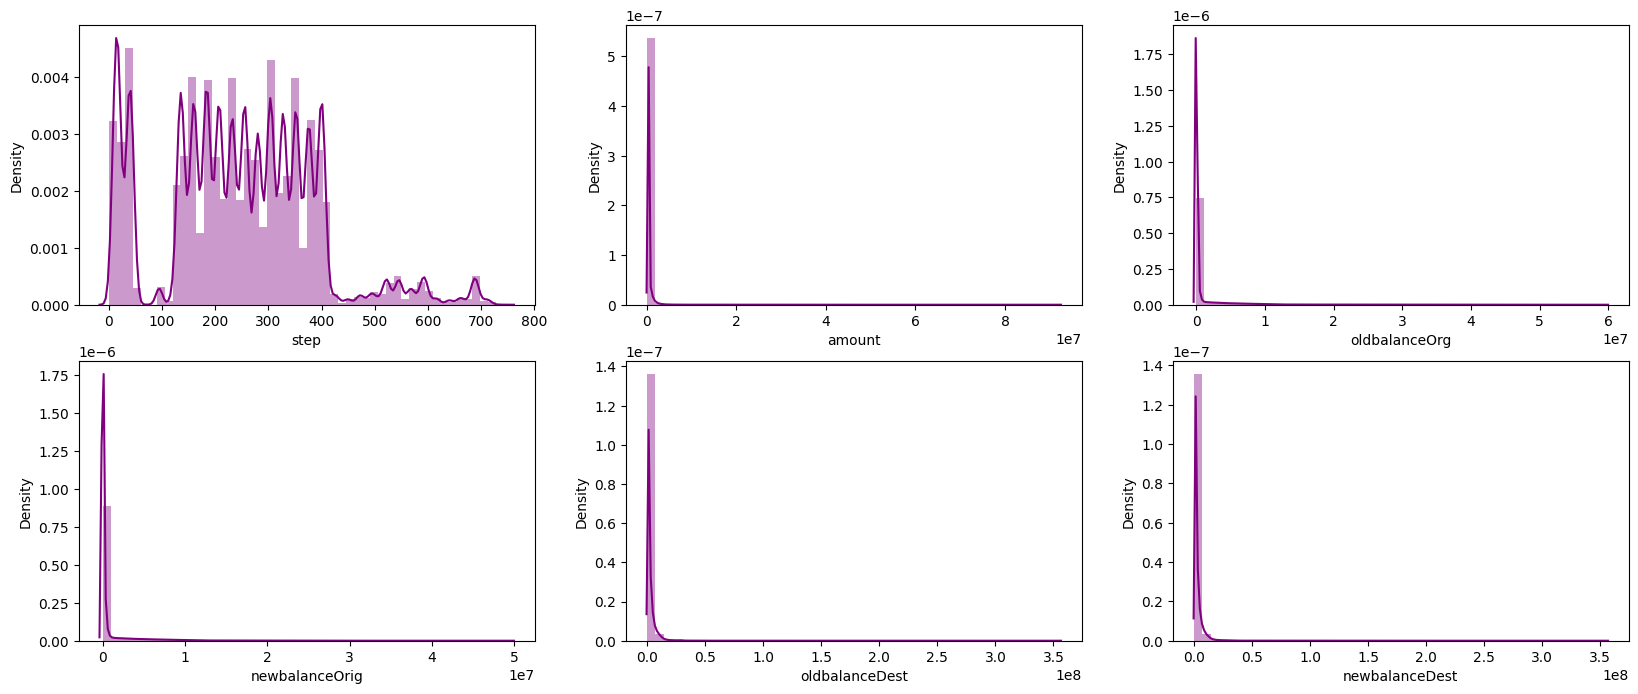

In [8]:
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
    plt.subplot(2,3,features.index(feature)+1)
    sns.distplot(df[feature],hist=True,color='purple')
plt.show()

## Graph for class imbalance

Text(0.5, 1.0, 'Count of fraudulent and non-fraudulent transactions')

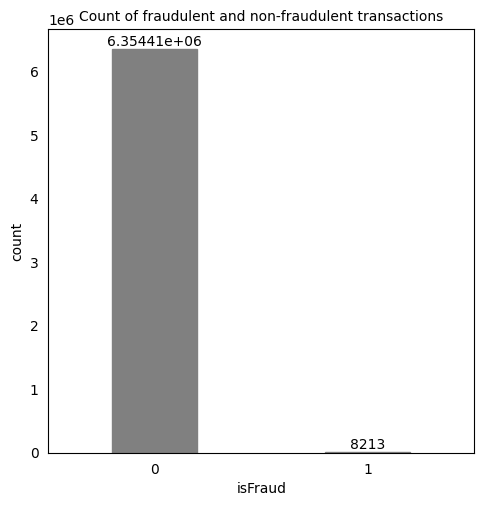

In [25]:
from tkinter import font
counts = df['isFraud'].value_counts().rename_axis('isFraud').reset_index(name='count')
fig = plt.figure(figsize=(5.5, 5.5))
ax = sns.barplot(x='isFraud', y='count', data=counts,color='gray', edgecolor ="gray")

# Define Function in which we will pass new width
def Width(ax, new_width) :
    for patch in ax.patches :
        current_width = patch.get_width()
        difference = current_width - new_width
        # Set new width
        patch.set_width(new_width)
        # Now Recenter the Bars
        patch.set_x(patch.get_x() + difference * .5)
        ax.tick_params(bottom=False,left=False)
        
#Adjust width to 0.4
Width(ax, 0.4)
ax.bar_label(ax.containers[0])
plt.title('Count of fraudulent and non-fraudulent transactions',fontsize =10,color='black')

Text(0.5, 1.0, 'Count of fraudulent and non-fraudulent transactions')

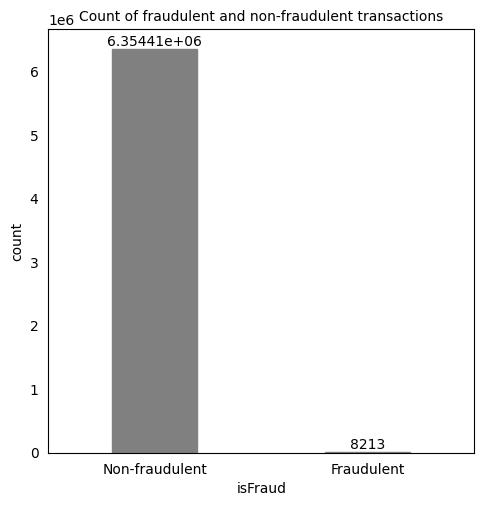

In [26]:
from tkinter import font

counts = df['isFraud'].value_counts().rename_axis('isFraud').reset_index(name='count')

fig = plt.figure(figsize=(5.5, 5.5))
ax = sns.barplot(x='isFraud', y='count', data=counts, color='gray', edgecolor='gray')

# Define Function in which we will pass new width
def Width(ax, new_width):
    for patch in ax.patches:
        current_width = patch.get_width()
        difference = current_width - new_width
        # Set new width
        patch.set_width(new_width)
        # Now Recenter the Bars
        patch.set_x(patch.get_x() + difference * .5)
        ax.tick_params(bottom=False, left=False)

# Adjust width to 0.4
Width(ax, 0.4)

# Add labels to the graph
ax.set_xticklabels(['Non-fraudulent', 'Fraudulent'])

ax.bar_label(ax.containers[0])

plt.title('Count of fraudulent and non-fraudulent transactions', fontsize=10, color='black')

In [10]:
# count the number of times 0 and 1 appear in the isFraud column
counts = df['isFraud'].value_counts()

print(counts)

0    6354407
1       8213
Name: isFraud, dtype: int64


In [38]:
print( '\nSkewness for data : ', skew(df.step))
print( '\nSkewness for data : ', skew(df.amount))
print( '\nSkewness for data : ', skew(df.oldbalanceOrg))
print( '\nSkewness for data : ', skew(df.newbalanceOrig))


Skewness for data :  0.3751768000211631

Skewness for data :  30.99394217560623

Skewness for data :  5.249135183108952

Skewness for data :  5.176882780698714


In [31]:
from scipy.stats import skew

## Transactions

In [11]:
#Create New DataFrame with Count
new_df = df["type"].value_counts().rename_axis('types_of_transaction').reset_index(name='counts')
new_df.head()

,types_of_transaction,counts
0,CASH_OUT,2237500
1,PAYMENT,2151495
2,CASH_IN,1399284
3,TRANSFER,532909
4,DEBIT,41432


In [12]:
#Set lables and values
my_labels = new_df.types_of_transaction
print(my_labels)
my_values = new_df.counts

0    CASH_OUT
1     PAYMENT
2     CASH_IN
3    TRANSFER
4       DEBIT
Name: types_of_transaction, dtype: object


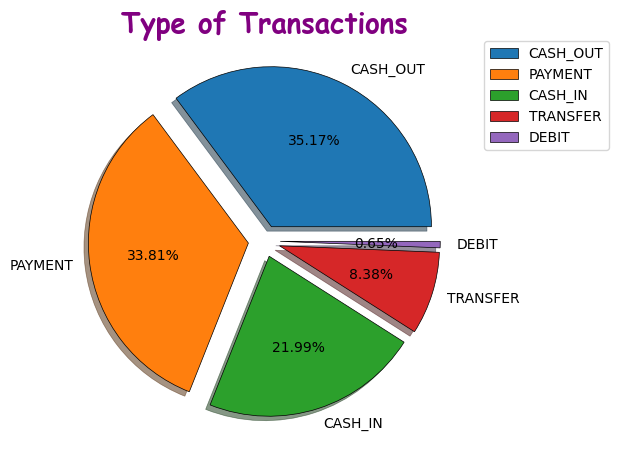

In [13]:
#Visualize the pie chart
fig=plt.figure(figsize=(4,4)) # Resize
wp= {'linewidth':0.5,'edgecolor':"black"}
ax=fig.add_axes([0,0,1,1]) # Add axis to the figure
ax.axis('equal')
explode=(0.1,0.1,0.1,0.1,0.1)
ax.pie(my_values, labels=my_labels, autopct='%1.2f%%',explode=explode,shadow=True,wedgeprops=wp)
font = {'fontname':'Comic Sans MS'} # Change font
plt.title('Type of Transactions',fontsize=20,color='purple',**font,fontweight='bold')
plt.legend(['CASH_OUT', 'PAYMENT', 'CASH_IN','TRANSFER','DEBIT'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Feature encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of label Encoder
le = LabelEncoder()

# Using .fit_transform function to fit label and return encoded label
label = le.fit_transform(df['type'])

# removing the column 'type' from df as it is of no use now.
df.drop("type", axis=1, inplace=True)

# Appending the array to our dataFrame with column name 'type'
df["type"] = label

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label

## Stratified train-test split

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.99871
1    0.00129
Name: isFraud, dtype: float64


## Save train, test and validation sets to csv

In [10]:
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\train.csv", index=False)
X_test.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\test.csv", index=False)

## Skewness after encoding

### Assess skewness in X_train in Stata

## Correlated features

<AxesSubplot:>

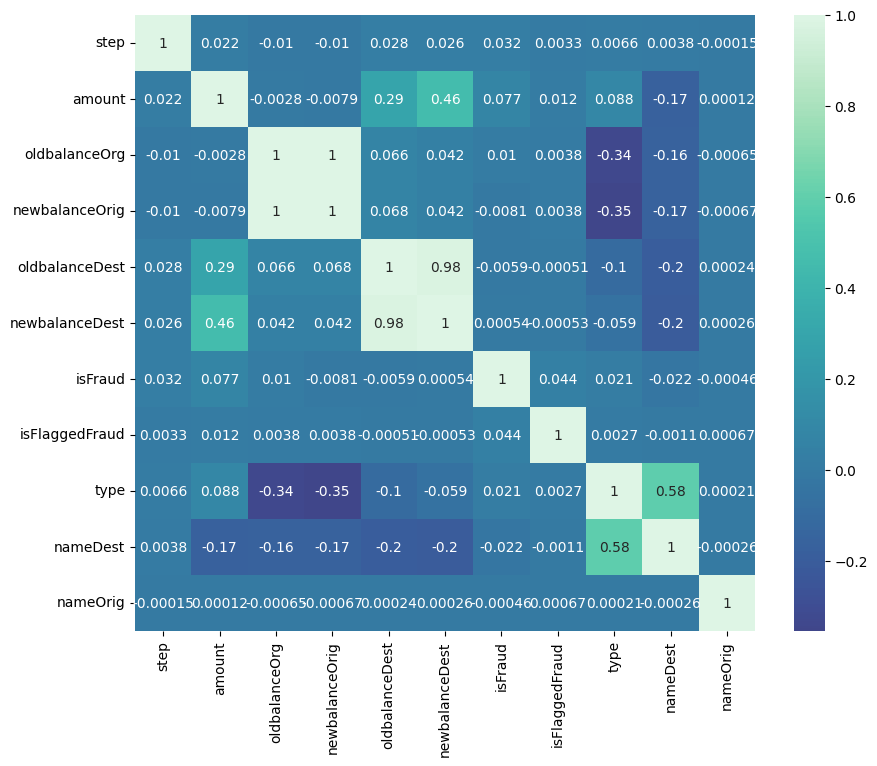

In [19]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(10,8)) # Resize
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True)

<AxesSubplot:>

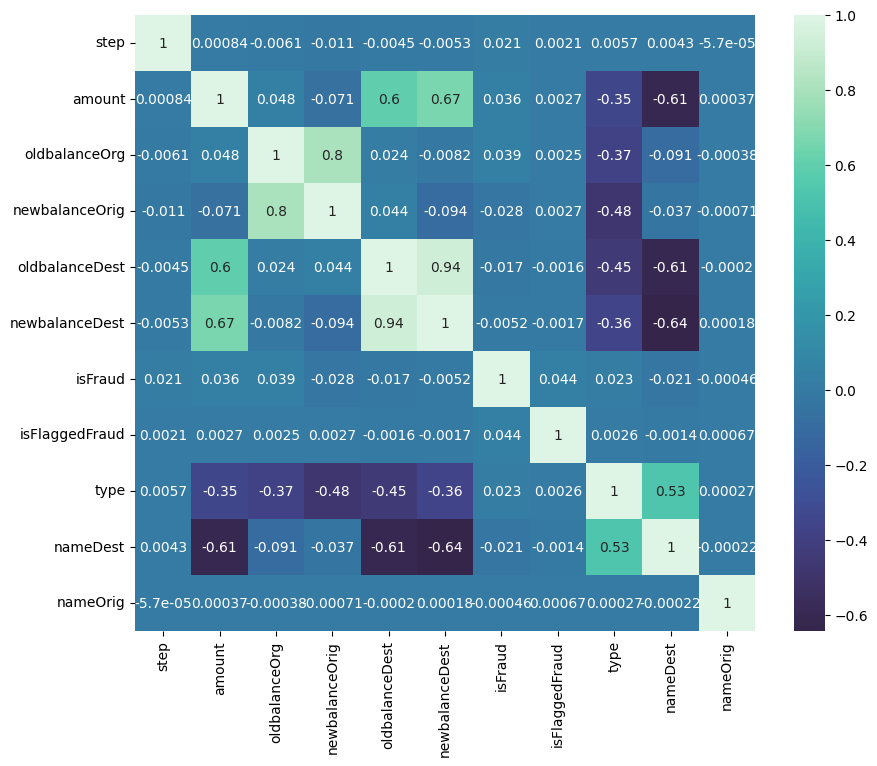

In [20]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(10,8)) # Resize
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True)

## Outliers labeling

## Modified Z-Socre

In [22]:
from scipy.stats import weibull_min, beta, lognorm, chi2,gamma,expon

# Select the columns you want to check for outliers
columns_to_trim = ['amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'newbalanceDest']

# Calculate modified Z-score for each column
for col in columns_to_trim:
    # Extract column values
    col_values = X_train[col].values
    
    # Replace 0 or negative values with a small positive value
    #col_values[col_values <= 0] = 1e-9
    col_values += 1e-9
    col_values[col_values == 0] = 1e-9


    # Fit distribution and extract relevant parameters
    if col == 'amount' or col == 'oldbalanceOrg' or col == 'oldbalanceDest':
        shape, loc, scale = weibull_min.fit(col_values, loc=0)
        med = weibull_min.median(shape, loc=loc, scale=scale)
        n = len(col_values)
        MAD = np.median(np.abs(col_values - np.median(col_values)))
        k = 1.4826 * MAD
        wmad = k * np.power(np.log(2), 1/k) * med
        mod_z_score = k * (col_values - med) / wmad
    
    elif col == 'newbalanceDest':
        # Fit gamma distribution and extract relevant parameters
        shape, loc, scale = gamma.fit(col_values, floc=0)
        med = gamma.median(shape, loc=loc, scale=scale)
        n = len(col_values)
        MAD = np.median(np.abs(col_values - np.median(col_values)))
        k = 1.4826 * MAD
        wmad = k * np.power(np.log(2), 1/k) * med
        if wmad == 0:
            #mod_z_score = np.zeros(n)
            mod_z_score = np.full(n, np.nan)
        else:
            mod_z_score = k * (col_values - med) / wmad

    # Fit distribution and extract relevant parameters
    elif col == 'newbalanceOrig':
        col_values[col_values == 0] = 1e-200
        # Fit exponential distribution and extract relevant parameters
        loc, scale = expon.fit(col_values, floc=0)
        med = expon.median(loc=loc, scale=scale)
        n = len(col_values)
        MAD = np.median(np.abs(col_values - np.median(col_values)))
        if MAD == 0:
            k = 1e-200
        else:
            k = 1.4826 * MAD
        wmad = k * np.power(np.log(2), 1/k) * med
        #mod_z_score = k * (col_values - med) / wmad
        mod_z_score = np.zeros(len(col_values))
        mod_z_score[1:-1] = np.abs(col_values[1:-1] - np.median(col_values)) / (1.4826 * np.median(np.abs(col_values - np.median(col_values))) + 1e-9)
   
    # Count number of lower and upper outliers
    lower_outliers = np.sum(mod_z_score < -2.5)
    upper_outliers = np.sum(mod_z_score > 2.5)
    
    #Print results
    print(f"Column {col}")
    print(f"Number of lower outliers for column: {lower_outliers}")
    print(f"Number of upper outliers: {upper_outliers}")
    print(f"\n")

Column amount
Number of lower outliers for column: 0
Number of upper outliers: 1218286


Column oldbalanceOrg
Number of lower outliers for column: 0
Number of upper outliers: 628466


Column oldbalanceDest
Number of lower outliers for column: 0
Number of upper outliers: 967820


Column newbalanceOrig
Number of lower outliers for column: 0
Number of upper outliers: 2477488


Column newbalanceDest
Number of lower outliers for column: 0
Number of upper outliers: 3529306




## IQR

In [27]:
import pandas as pd

# Select the columns you want to check for outliers
columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate IQR for each column
q1 = X_train[columns_to_trim].quantile(0.25)
q3 = X_train[columns_to_trim].quantile(0.75)
iqr = q3 - q1

# Determine the lower and upper boundaries for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count the number of lower and upper outliers in each column
num_lower_outliers = (X_train[columns_to_trim] < lower_bound).sum()
num_upper_outliers = (X_train[columns_to_trim] > upper_bound).sum()

# Print results
print(f"Number of lower outliers:\n",num_lower_outliers)
print(f"\n")
print(f"Number of upper outliers:\n",num_upper_outliers)

Number of lower outliers:
 amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


Number of upper outliers:
 amount             304201
oldbalanceOrg     1001209
newbalanceOrig     948230
oldbalanceDest     707395
newbalanceDest     664380
dtype: int64


## Estimate trimming proportion

In [60]:
import pandas as pd
import numpy as np


# Extract the columns of interest
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = X_train[cols]

# Loop over each column and determine the direction of trimming
for col in cols:
    # Calculate the median and interquartile range of the column
    median = np.median(data[col])
    iqr = np.percentile(data[col], 75) - np.percentile(data[col], 25)

    # Calculate the skewness of the column
    skewness = data[col].skew()

    # Determine whether to use symmetric or asymmetric trimming based on the skewness and IQR
    if abs(skewness) > 1.5 or iqr > 2 * abs(median):
        print(f"For column {col}, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.")
    else:
        print(f"For column {col}, the data is roughly symmetric, so symmetric trimming may be appropriate.")

For column amount, the data is roughly symmetric, so symmetric trimming may be appropriate.
For column oldbalanceOrg, the data is roughly symmetric, so symmetric trimming may be appropriate.
For column newbalanceOrig, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.
For column oldbalanceDest, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.
For column newbalanceDest, the data is roughly symmetric, so symmetric trimming may be appropriate.


## Outlier hadling

## Trimmed Means and Bootstrapping

In [11]:
import random
random.seed (20)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.15, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.27, 'oldbalanceDest': 0.23, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train.loc[X_train[col_name] > np.percentile(X_train[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 57183.06, 'oldbalanceOrg': 7175.1123, 'newbalanceOrig': 3818.5493, 'oldbalanceDest': 72497.055, 'newbalanceDest': 106487.16}


## Save train and test data after handling outliers

In [12]:
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\trainAFTERTREATINGOUT.csv", index=False)
X_test.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\testAFTERTREATINGOUT.csv", index=False)

In [83]:
print(X_train.shape)

(5726358, 10)


## Assess skewness on Stata

## Feature selection using random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier (n_estimators=150,random_state=18)
rfc.fit(X_train,y_train)

## Random Forest Impurity based feature importance

In [ ]:
import matplotlib.pyplot as plt

# Get the feature importance values
importance_vals = rfc.feature_importances_

# Sort importance values
indices = np.argsort(importance_vals[::-1])

# Plot the feature importance of the forest
plt.figure()
plt.title("Random Forest Impurity based feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices][::-1])

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

In [ ]:
rfc.feature_names_in_ = list(X_train.columns)